<a href="https://colab.research.google.com/github/sikoh/DS-Linear-Models/blob/main/Linear-Regression-2/DS_LinearRegression2_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [77]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt


In [17]:
def wrangle(filepath):
    df = pd.read_csv(filepath)

    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) &
            (df['price'] <= np.percentile(df['price'], 99.5)) &
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) &
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) &
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

    return df

filepath = 'https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame.
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [18]:
# ok, lets explore first before we change anything

df = wrangle(filepath)
df.head(2)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#lets check the data type of the data in 'created'
type(df['created'][0])

str

In [20]:
# lets check our null values(NaN)
df.isnull().sum()

bathrooms                  0
bedrooms                   0
created                    0
description             1425
display_address          133
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
dtype: int64

In [22]:
df.shape

(48817, 34)

In [23]:
#lets modify the function above
# goals:
# The 'created' column will parsed as a DateTime object and set as the index of the DataFrame.
# Rows with NaN values will be dropped.

# we will also rename the function addding _ at the end:
def wrangle_(filepath):
    df = pd.read_csv(filepath)

    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) &
            (df['price'] <= np.percentile(df['price'], 99.5)) &
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) &
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) &
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

    # Parse 'created' as a DateTime object
    df['created'] = pd.to_datetime(df['created'])

    # Set 'created' as the index of the DataFrame
    df.set_index('created', inplace=True)

    # Remove rows with NaN values
    df.dropna(inplace=True)

    return df

filepath = 'https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/apartments/renthop-nyc.csv'


In [24]:
df = wrangle_(filepath)
df.head(2)

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,...,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,...,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#Timestamp in Pandas is the same as DateTime in Python
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
df.isnull().sum().sum()

0

**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features.

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

In [ ]:
# Conduct your exploratory data analysis here,
# and then modify the function above.

In [36]:
df.columns

Index(['bathrooms', 'bedrooms', 'description', 'display_address', 'latitude',
       'longitude', 'price', 'street_address', 'interest_level', 'elevator',
       'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman',
       'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center',
       'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space',
       'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool',
       'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio',
       'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

In [38]:
df['cats_allowed'].head(5)

created
2016-06-24 07:54:24    0
2016-06-12 12:19:27    1
2016-04-17 03:26:41    0
2016-04-18 02:22:02    0
2016-04-28 01:32:41    0
Name: cats_allowed, dtype: int64

In [39]:
df['dogs_allowed'].head(5)

created
2016-06-24 07:54:24    0
2016-06-12 12:19:27    1
2016-04-17 03:26:41    0
2016-04-18 02:22:02    0
2016-04-28 01:32:41    0
Name: dogs_allowed, dtype: int64

In [54]:
#lets modify the function above
# goals:
# Using your pandas and dataviz skills decide on two features that you want to engineer for your dataset.
# Next, modify your wrangle function to add those features.

#we will create and add 2 more columns to our data set: total_rooms = (beds + baths), and dogs_and_cats_allowed = Are cats AND dogs allowed?
# we will also rename the function addding 2 at the end: this is just to keep track of our versions of the function.
def wrangle_2(filepath):
    df = pd.read_csv(filepath)

    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) &
            (df['price'] <= np.percentile(df['price'], 99.5)) &
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) &
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) &
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

    # Parse 'created' as a DateTime object
    df['created'] = pd.to_datetime(df['created'])

    # Set 'created' as the index of the DataFrame
    df.set_index('created', inplace=True)

    # Remove rows with NaN values
    df.dropna(inplace=True)

    #Create 'dogs_and_cats_allowed'
    df['dogs_and_cats_allowed'] = df.apply(lambda row: 1 if row['cats_allowed'] == 1 and row['dogs_allowed'] == 1 else 0, axis=1)

    #Create 'total_rooms'
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']

    return df

filepath = 'https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/apartments/renthop-nyc.csv'


In [55]:
df = wrangle_2(filepath)
df.columns

Index(['bathrooms', 'bedrooms', 'description', 'display_address', 'latitude',
       'longitude', 'price', 'street_address', 'interest_level', 'elevator',
       'cats_allowed', 'hardwood_floors', 'dogs_allowed', 'doorman',
       'dishwasher', 'no_fee', 'laundry_in_building', 'fitness_center',
       'pre-war', 'laundry_in_unit', 'roof_deck', 'outdoor_space',
       'dining_room', 'high_speed_internet', 'balcony', 'swimming_pool',
       'new_construction', 'terrace', 'exclusive', 'loft', 'garden_patio',
       'wheelchair_access', 'common_outdoor_space', 'dogs_and_cats_allowed',
       'total_rooms'],
      dtype='object')

In [56]:
(df[df['dogs_and_cats_allowed']==1]).shape

(20924, 35)

In [57]:
(df[df['dogs_and_cats_allowed']==0]).shape

(26336, 35)

In [52]:
df.shape

(47260, 35)

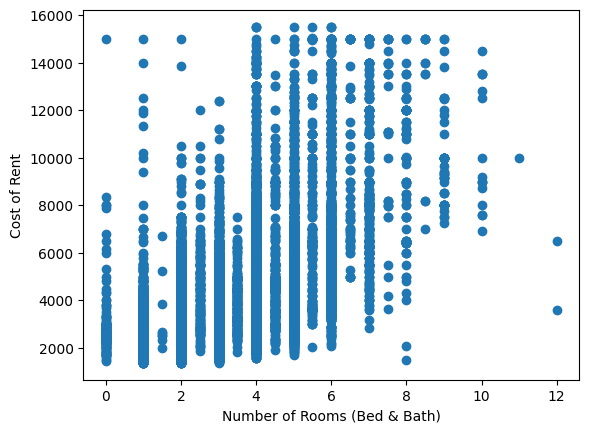

In [61]:
#lets visualize
plt.scatter(df['total_rooms'], df['price'])
plt.xlabel('Number of Rooms (Bed & Bath)')
plt.ylabel('Cost of Rent');

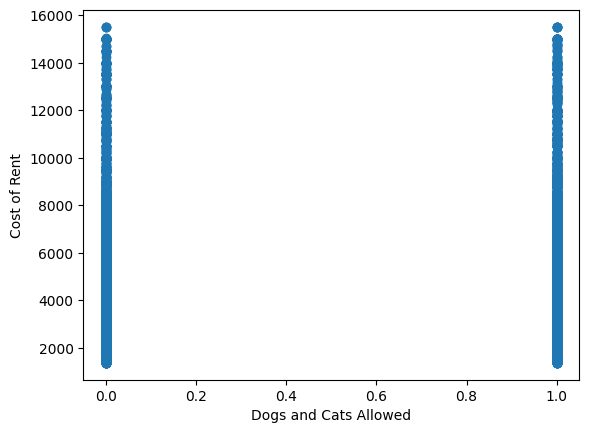

In [66]:
plt.scatter(df['dogs_and_cats_allowed'], df['price'])
#plt.ylim(0, 2)
plt.xlabel('Dogs and Cats Allowed')
plt.ylabel('Cost of Rent');

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [ ]:
X = df[['total_rooms', 'dogs_and_cats_allowed']]
y = df['price']

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016.
- Your test set should include data from June 2016.

In [68]:
# Filter data for April and May 2016 for the training set
X_train = df[(df.index.month.isin([4, 5])) & (df.index.year == 2016)][['total_rooms', 'dogs_and_cats_allowed']]
y_train = df[(df.index.month.isin([4, 5])) & (df.index.year == 2016)]['price']

# Filter data for June 2016 for the test set
X_test = df[(df.index.month == 6) & (df.index.year == 2016)][['total_rooms', 'dogs_and_cats_allowed']]
y_test = df[(df.index.month == 6) & (df.index.year == 2016)]['price']

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [70]:
#train mae
y_pred = [y_train.mean()] * len(y_train)
baseline_mae = mae(y_train, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1202.398300781848


In [71]:
#test mae
y_pred = [y_test.mean()] * len(y_test)
baseline_mae = mae(y_test, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1204.6619239372108


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [72]:
# Step 1: Import predictor class

# Step 2: Instantiate predictor
model = LR()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred_train = model.predict(X_train)
y_pred_train

array([2889.71766569, 2889.71766569, 5319.06580942, ..., 3078.95940045,
       2269.17668587, 3699.50038026])

In [74]:
y_pred_test = model.predict(X_test)
y_pred_test

array([4914.17445213, 3888.74211502, 2889.71766569, ..., 3078.95940045,
       3888.74211502, 3699.50038026])

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [81]:
training_mae = mae(y_train, y_pred_train)
test_mae = mae(y_test, y_pred_test)

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 884.5130672066576
Test MAE: 903.9326680834124


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [82]:
training_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 0.42526850602104305
Test MAE: 0.4272941029136835


In [85]:
# TRAINING DATA
# Make y predictions
y_pred_train = model.predict(X_train)

# Mse, rmse, mae, r^2
mse_train= mse(y_train, y_pred_train)
rmse_train= np.sqrt(mse_train)
mae_train= mae(y_train, y_pred_train)
r2_train= r2_score(y_train, y_pred_train)

print('Train Mean Squared Error:', mse_train)
print('Train Root Mean Squared Error:', rmse_train)
print('Train Mean Absolute Error:', mae_train)
print('Train R^2:', r2_train)

Train Mean Squared Error: 1788714.340263815
Train Root Mean Squared Error: 1337.4282561183666
Train Mean Absolute Error: 884.5130672066576
Train R^2: 0.42526850602104305


In [86]:
# TESTING DATA
# Make y predictions
y_pred_test= model.predict(X_test)

# Mse, rmse, mae, r^2
mse_test= mse(y_test, y_pred_test)
rmse_test= np.sqrt(mse_test)
mae_test= mae(y_test, y_pred_test)
r2_test= r2_score(y_test, y_pred_test)

print('Test Mean Squared Error:', mse_test)
print('Test Root Mean Squared Error:', rmse_test)
print('Test Mean Absolute Error:', mae_test)
print('Test R^2:', r2_test)

Test Mean Squared Error: 1788329.4539246666
Test Root Mean Squared Error: 1337.2843579151993
Test Mean Absolute Error: 903.9326680834124
Test R^2: 0.4272941029136835


1270.1522365329424

**VI. Communicate Results**

Stretch Goal: What are the three most influential coefficients in your linear model? You should consider the absolute value of each coefficient, so that it doesn't matter if it's positive or negative.

In [95]:
model.intercept_,model.coef_

(1270.1522365329424, array([809.78271458, 189.24173476]))

In [96]:
beta0=model.intercept_
beta1, beta2 = model.coef_
print(f'y={beta0:.2f} + {beta1:.2f}*x1 + {beta2:.2f}*x2')

y=1270.15 + 809.78*x1 + 189.24*x2


In [97]:
print('Intercept for the above linear regression model is: ', model.intercept_)
coefficients = pd.Series(model.coef_,['total_rooms','dogs_and_cats_allowed'])
print(coefficients.to_string())

Intercept for the above linear regression model is:  1270.1522365329424
total_rooms              809.782715
dogs_and_cats_allowed    189.241735


In [102]:
import itertools
import plotly.express as px
import plotly.graph_objs as go


In [103]:
def regression_3d (df, x, y, z, num = 100, **kwargs):
  fig = px.scatter_3d(df,x,y,z,**kwargs)
  features = [x,y]
  target = z
  model = LR()
  model.fit(df[features], df[target])

  xmin,xmax = df[x].min(), df[x].max()
  ymin,ymax = df[y].min(),df[y].max()

  xcoords = np.linspace(xmin, xmax, num)
  ycoords = np.linspace(ymin, ymax, num)
  coords = list(itertools.product(xcoords, ycoords))

  predictions = model.predict(coords)
  Z = predictions.reshape(num,num).T

  fig.add_trace(go.Surface(x=xcoords,y=ycoords,z=Z))
  return fig

In [104]:
regression_3d(df[(df.index.month.isin([4, 5])) & (df.index.year == 2016)],
              x = 'total_rooms',
              y = 'dogs_and_cats_allowed',
              z = 'price',
              title = 'Costs to Rent an Apartment in NYC, 2016/04-2016/05')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

